In [1]:
import math

In [2]:
import matplotlib.pyplot as plt

In [3]:
import fuzzy
import fuzzy.storage.fcl.Reader
from fuzzy.doc.plot.gnuplot import doc

# Считывание FIS

In [4]:
system = fuzzy.storage.fcl.Reader.Reader().load_from_file("FIS/lab2.fcl")
DOC = doc.Doc('lab - 2')

# Отрисовка функций принадлежности

In [9]:
def prepaire_input(temperature, pressure):
    
    sys_input = {
        'water': temperature,
        'pressure': pressure
    }
    
    return sys_input

In [10]:
def prepaire_output():
    sys_output = {
        'craneCold': 0, 
        'craneHot': 0
    }
    
    return sys_output

In [11]:
def generate_temperature(time):

    t_cold = 15 + 10 * math.sin(float(math.pi * time) / 50 + 20)
    t_hot = 60 + 20 * math.sin(float(math.pi * time) / 60)
    
    return (t_cold, t_hot)

In [12]:
def result_temperature(t_cold, t_hot, q_cold, q_hot):
    return (t_cold * q_cold + t_hot * q_hot) / (q_cold + q_hot)

In [13]:
def result_pressure(q_cold, q_hot):
    return (q_cold + q_hot) / 2

In [14]:
MINS = 20
STEP_SECS = 1

STEPS = int(MINS * 60 / STEP_SECS)

TEMPERATURES = list()
PRESSURES = list()
QC = list()
QH = list()

t_c, t_h = generate_temperature(0)
q_c = q_h = 1e-15

for t in range(1, STEPS):
    
    Q = result_pressure(q_c, q_h)
    T = result_temperature(t_c, t_h, q_c, q_h)
    
    in_sys = prepaire_input(T, Q)
    out_sys = prepaire_output()
    
    out_sys = system.calculate(in_sys, out_sys)
    
    q_cold = out_sys['craneCold']
    q_hot = out_sys['craneHot']
    
    q_c += q_cold
    q_h += q_hot
    
    QC.append(q_c)
    QH.append(q_h)
    
    TEMPERATURES.append(T)
    PRESSURES.append(Q)
        
    t_c, t_h = generate_temperature(t)    

## Температура от времени

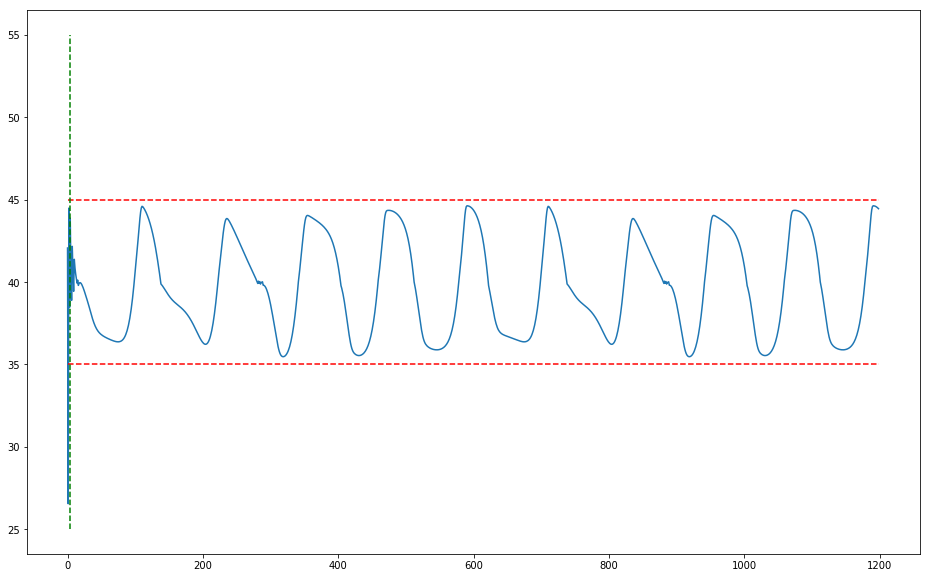

In [15]:
plt.figure(figsize=(16, 10))
plt.plot(TEMPERATURES)
plt.plot([0, len(TEMPERATURES)], [45, 45], '--r')
plt.plot([0, len(TEMPERATURES)], [35, 35], '--r')
plt.plot([4, 4], [25, 55], '--g')
plt.show()

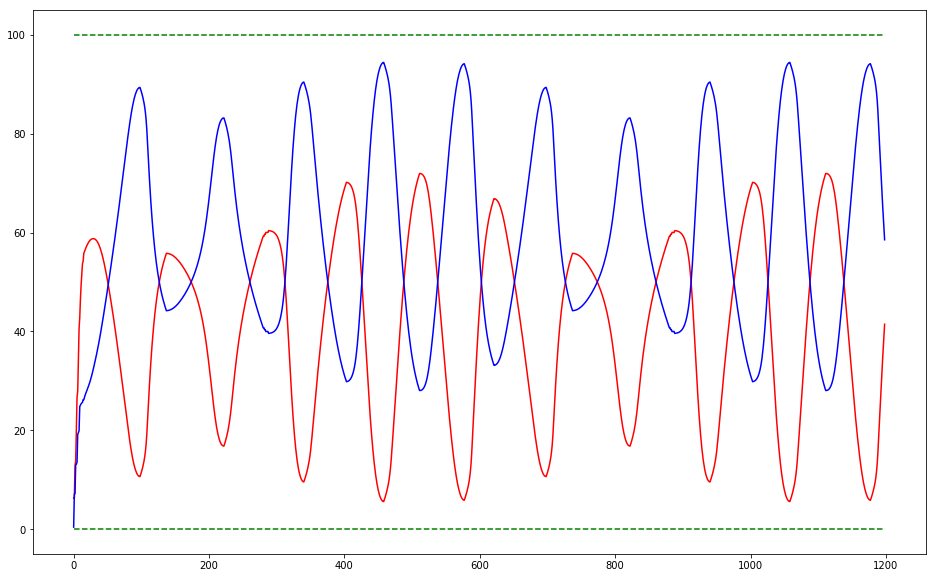

In [16]:
plt.figure(figsize=(16, 10))
plt.plot(QC, 'r')
plt.plot(QH, 'b')
plt.plot([0, len(QC)], [0, 0], '--g')
plt.plot([0, len(QC)], [100, 100], '--g')
plt.show()

### На 4-й секунде температура становится комфортной

## Напор от времени

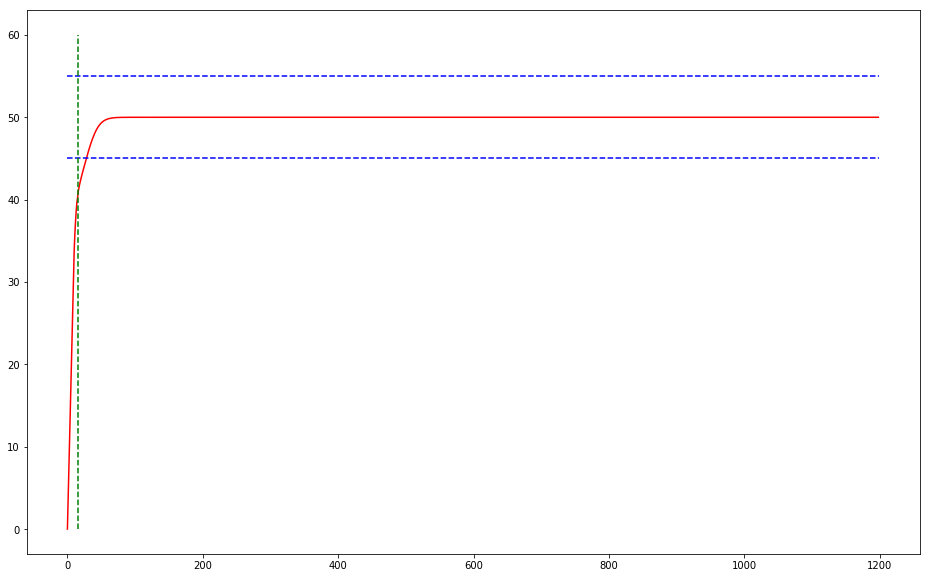

In [17]:
plt.figure(figsize=(16, 10))
plt.plot(PRESSURES, 'r')
plt.plot([0, len(PRESSURES)], [45, 45], '--b')
plt.plot([0, len(PRESSURES)], [55, 55], '--b')
plt.plot([15, 15], [0, 60], '--g')
# plt.plot(PRESSURES, 'ob')
# plt.title('Напор воды')
plt.show()

### На 15 секунде напор становится комфортным